In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('tested.csv',usecols =['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_5680\1782328897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


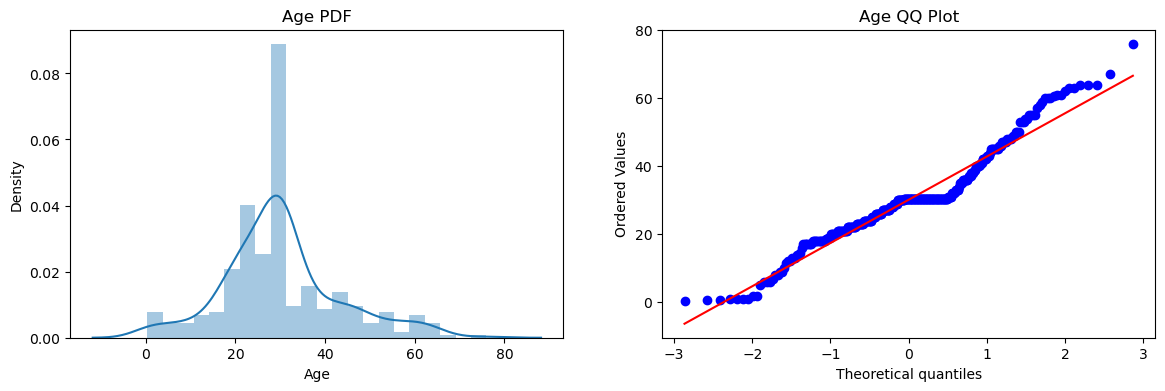

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_5680\3044423425.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


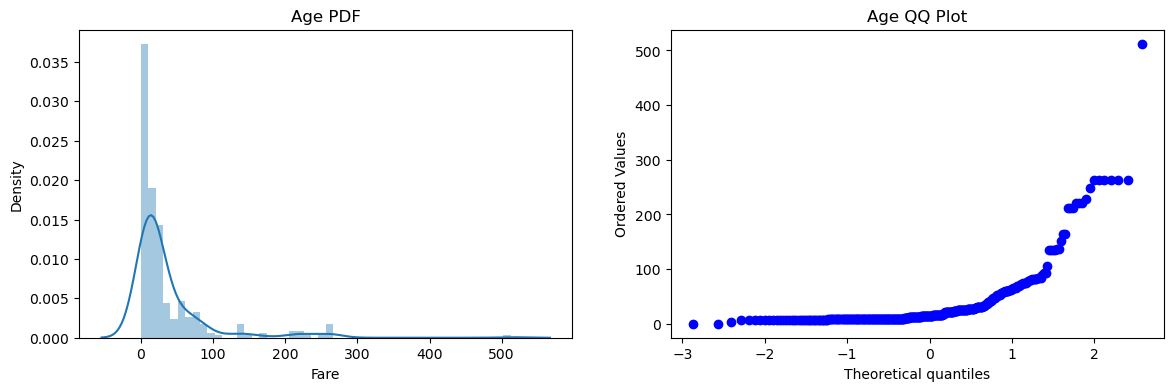

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

In [17]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [23]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
    
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
x_train_tra